In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import spacy
nlp = spacy.load('ja_ginza')

In [23]:
from parse_5w1h import parse_5w1h
#テストファイル読み込み&下処理
path = "/Users/shota/Documents/itac/test_summary1.txt"
with open(path) as f:
    text = f.read()
text = text.replace('\n','')
print(text)
doc = nlp(text)

OK えっとー聞こえる。はい聞こえます。AI専用のホームページの話があったじゃん。はい。あれさあ尾崎の方でもってもらいたいの。承知しました。多分出来上がって石井さんから入れてもらってるんだけどあれおすすめらんないかな。承知しました。請求とかが今。さっさとホームページ出してほしいんじゃないのページを公開をちょっとあるお酒持ってもらっていい。色々あるから大変だったらちょっと俺に言って。承知しました。塩釜もあるしアイタムズのさっき言ったようにちょっと持ってるじゃん。じゃあITDは伊藤にさあ引き継いでいいから。承知しました。ITD伊藤に引き継いだ後でもいいんだけどでいいから AIのホームページのやつ入ってほしいからだからアイタムズ今月、5月も少しあるのかな、塩釜メインでそういう感じでいい、ちょっとお願いして。承知しました。一点だけですね、ご報告したいことがありまして。どこか明日の10時まであの日本テクト条件で作業が厳しいということを伺ったんですね。なのでもう人を入れるしかないと考えております。なるほどね。はい。日本テクトってそんな忙しいんだ。IBMのもやってるからね。なるほど。中島さんもほぼ同じ状況のようです。 かといって誰入れる。でもそうですね。　JAVAで岡島さん作ってんでしょ。言語ちょっと確認して。PHPです。で作ってるって。今じゃあできるけど忙しいから。PHPだったらでもまだ見つかるね。ちょっと俺じゃあ当たるわ。 もう一つがですねswiftで万歩計アプリってかかるれている。あっちはとさんできる。ようさん監修の元とさんって感じかな。PHPが尾崎の動きの方が好きでいいと思うんだよ。最もマルチプラットフォームだと望ましいんですよ。あーそうだな。一旦もういいよ。りょうさん空くまでIOSでとさんやってもらって、 Android の対応も最悪 Android で出てくるけど後でフラットにする。ちょっとら当たる。あのグループで今から投げるからちょっと待ってここで。今投げた。優先順位としては塩釜一番なのは変わりないから尾崎は2番目がアイタイムズで、ITD の件は3番目。ITDのやつが終わってからでいい、AIのホームページは。忘れないでね。早く会いたいですね先週だっけ石井さんから言われてるやつあごめんちょっとそれはそうだな


In [4]:
text= '金曜日の朝、ケンタッキー州の工業団地で巨大な火事が発生し、当局が被害を封じ込めようと働いたため、その地域に濃い煙が噴出した。市の緊急管理機関のマイク・ワイマー氏によると、ルイビルのゼネラル・エレクトリック・アプライアンス・パークで午前7時少し前に火災が始まりました。 彼は、負傷者や閉じ込められた者の報告はないと言った。 ビデオは煙と明るいオレンジ色の炎の両方を示しました。 消防士は影響を受けた建物の周りの位置を取り、周辺から水を噴霧しました。 ワイマーは、当局が火災の原因を知らなかったとCNNに語り、少なくとも4つの警報が鳴った。 GEのWebサイトによると、ルイビルアプライアンスパークの施設は、米国の製造業を活性化しています。 公園は大きく、34のサッカー場が施設内の倉庫の1つに収まるようになっています。'
print(text)
doc = nlp(text)

金曜日の朝、ケンタッキー州の工業団地で巨大な火事が発生し、当局が被害を封じ込めようと働いたため、その地域に濃い煙が噴出した。市の緊急管理機関のマイク・ワイマー氏によると、ルイビルのゼネラル・エレクトリック・アプライアンス・パークで午前7時少し前に火災が始まりました。 彼は、負傷者や閉じ込められた者の報告はないと言った。 ビデオは煙と明るいオレンジ色の炎の両方を示しました。 消防士は影響を受けた建物の周りの位置を取り、周辺から水を噴霧しました。 ワイマーは、当局が火災の原因を知らなかったとCNNに語り、少なくとも4つの警報が鳴った。 GEのWebサイトによると、ルイビルアプライアンスパークの施設は、米国の製造業を活性化しています。 公園は大きく、34のサッカー場が施設内の倉庫の1つに収まるようになっています。


In [5]:
for sent in doc.sents:
    print(sent.start)
    print(sent.end)
    print(doc[sent.start:sent.end])

0
36
金曜日の朝、ケンタッキー州の工業団地で巨大な火事が発生し、当局が被害を封じ込めようと働いたため、その地域に濃い煙が噴出した。
36
70
市の緊急管理機関のマイク・ワイマー氏によると、ルイビルのゼネラル・エレクトリック・アプライアンス・パークで午前7時少し前に火災が始まりました。
70
87
彼は、負傷者や閉じ込められた者の報告はないと言った。
87
103
ビデオは煙と明るいオレンジ色の炎の両方を示しました。
103
126
消防士は影響を受けた建物の周りの位置を取り、周辺から水を噴霧しました。
126
153
ワイマーは、当局が火災の原因を知らなかったとCNNに語り、少なくとも4つの警報が鳴った。
153
177
GEのWebサイトによると、ルイビルアプライアンスパークの施設は、米国の製造業を活性化しています。
177
201
公園は大きく、34のサッカー場が施設内の倉庫の1つに収まるようになっています。


In [6]:
import networkx as nx

def increment_edge (graph, node0, node1):
    print("link {} {}".format(node0, node1))
    
    if graph.has_edge(node0, node1):
        graph[node0][node1]["weight"] += 1.0
    else:
        graph.add_edge(node0, node1, weight=1.0)

In [7]:
POS_KEPT = ["ADJ", "NOUN", "PROPN", "VERB"]

def link_sentence (doc, sent, lemma_graph, seen_lemma):
    visited_tokens = []
    visited_nodes = []

    for i in range(sent.start, sent.end):
        token = doc[i]

        if token.pos_ in POS_KEPT:
            #token.lemma_は原型. token.pos_は品詞
            key = (token.lemma_, token.pos_)

            if key not in seen_lemma:
                seen_lemma[key] = set([token.i])
            else:
                seen_lemma[key].add(token.i)

            node_id = list(seen_lemma.keys()).index(key)

            if not node_id in lemma_graph:
                lemma_graph.add_node(node_id)

            print("visit {} {}".format(visited_tokens, visited_nodes))
            print("range {}".format(list(range(len(visited_tokens) - 1, -1, -1))))
            
            for prev_token in range(len(visited_tokens) - 1, -1, -1):
                print("prev_tok {} {}".format(prev_token, (token.i - visited_tokens[prev_token])))
                
                if (token.i - visited_tokens[prev_token]) <= 3:
                    increment_edge(lemma_graph, node_id, visited_nodes[prev_token])
                else:
                    break

            print(" -- {} {} {} {} {} {}".format(token.i, token.text, token.lemma_, token.pos_, visited_tokens, visited_nodes))

            visited_tokens.append(token.i)
            visited_nodes.append(node_id)

In [8]:
lemma_graph = nx.Graph()
seen_lemma = {}

for sent in doc.sents:
    link_sentence(doc, sent, lemma_graph, seen_lemma)
    #break # only test one sentence

print(seen_lemma)

visit [] []
range []
 -- 0 金曜日 金曜日 NOUN [] []
visit [0] [0]
range [0]
prev_tok 0 2
link 1 0
 -- 2 朝 朝 NOUN [0] [0]
visit [0, 2] [0, 1]
range [1, 0]
prev_tok 1 2
link 2 1
prev_tok 0 4
 -- 4 ケンタッキー州 ケンタッキー州 PROPN [0, 2] [0, 1]
visit [0, 2, 4] [0, 1, 2]
range [2, 1, 0]
prev_tok 2 2
link 3 2
prev_tok 1 4
 -- 6 工業 工業 NOUN [0, 2, 4] [0, 1, 2]
visit [0, 2, 4, 6] [0, 1, 2, 3]
range [3, 2, 1, 0]
prev_tok 3 1
link 4 3
prev_tok 2 3
link 4 2
prev_tok 1 5
 -- 7 団地 団地 NOUN [0, 2, 4, 6] [0, 1, 2, 3]
visit [0, 2, 4, 6, 7] [0, 1, 2, 3, 4]
range [4, 3, 2, 1, 0]
prev_tok 4 2
link 5 4
prev_tok 3 3
link 5 3
prev_tok 2 5
 -- 9 巨大 巨大 ADJ [0, 2, 4, 6, 7] [0, 1, 2, 3, 4]
visit [0, 2, 4, 6, 7, 9] [0, 1, 2, 3, 4, 5]
range [5, 4, 3, 2, 1, 0]
prev_tok 5 2
link 6 5
prev_tok 4 4
 -- 11 火事 火事 NOUN [0, 2, 4, 6, 7, 9] [0, 1, 2, 3, 4, 5]
visit [0, 2, 4, 6, 7, 9, 11] [0, 1, 2, 3, 4, 5, 6]
range [6, 5, 4, 3, 2, 1, 0]
prev_tok 6 2
link 7 6
prev_tok 5 4
 -- 13 発生 発生 VERB [0, 2, 4, 6, 7, 9, 11] [0, 1, 2, 3, 4, 5, 6]
visit [0

In [9]:
labels = {}
keys = list(seen_lemma.keys())

for i in range(len(seen_lemma)):
    labels[i] = keys[i][0].lower()

labels


{0: '金曜日',
 1: '朝',
 2: 'ケンタッキー州',
 3: '工業',
 4: '団地',
 5: '巨大',
 6: '火事',
 7: '発生',
 8: '当局',
 9: '被害',
 10: '封じ込める',
 11: '働く',
 12: '為',
 13: '地域',
 14: '濃い',
 15: '煙',
 16: '噴出',
 17: '市',
 18: '緊急',
 19: '管理',
 20: '機関',
 21: 'マイク',
 22: 'ワイマー',
 23: '氏',
 24: 'よる',
 25: 'ルイビル',
 26: 'ゼネラル・エレクトリック',
 27: 'アプライアンス',
 28: 'パーク',
 29: '午前',
 30: '時',
 31: '前',
 32: '火災',
 33: '始まる',
 34: '負傷者',
 35: '閉じ込める',
 36: '者',
 37: '報告',
 38: '無い',
 39: '言う',
 40: 'ビデオ',
 41: '明るい',
 42: 'オレンジ',
 43: '色',
 44: '炎',
 45: '両方',
 46: '示す',
 47: '消防士',
 48: '影響',
 49: '受ける',
 50: '建物',
 51: '周り',
 52: '位置',
 53: '取る',
 54: '周辺',
 55: '水',
 56: '噴霧',
 57: 'ワイマー',
 58: '原因',
 59: '知る',
 60: 'cnn',
 61: '語る',
 62: '少ない',
 63: 'つ',
 64: '警報',
 65: '鳴る',
 66: 'ge',
 67: 'webサイト',
 68: '施設',
 69: '米国',
 70: '製造業',
 71: '活性化',
 72: '公園',
 73: '大きい',
 74: 'サッカー',
 75: '場',
 76: '施設内',
 77: '倉庫',
 78: '収まる',
 79: '成る'}

In [10]:
import matplotlib as mpl
print(mpl.rcParams['font.family'])

['sans-serif']


{0: Text(-0.3993542545145903, -0.2597944237614164, '金曜日'),
 1: Text(-0.45131482148446117, -0.3415071779358227, '朝'),
 2: Text(-0.44472322468657355, -0.431881938998208, 'ケンタッキー州'),
 3: Text(-0.402095342639869, -0.4982704311224231, '工業'),
 4: Text(-0.3899766921254877, -0.47232659230667173, '団地'),
 5: Text(-0.3097372813252089, -0.4953083490066494, '巨大'),
 6: Text(-0.18043781761951702, -0.49198563333601614, '火事'),
 7: Text(-0.04713031543443527, -0.4553991263189767, '発生'),
 8: Text(0.0799342533407521, -0.3747421434733874, '当局'),
 9: Text(0.22335782017415493, -0.2851924865999417, '被害'),
 10: Text(0.35166009102665957, -0.18024173145237643, '封じ込める'),
 11: Text(0.4694476769236542, -0.05907729916594825, '働く'),
 12: Text(0.5538582497222254, 0.0796108766840162, '為'),
 13: Text(0.6090699107007725, 0.22919811005274976, '地域'),
 14: Text(0.654002352471953, 0.29955733565816595, '濃い'),
 15: Text(0.6225672377810149, 0.3725218886818189, '煙'),
 16: Text(0.6907870336369519, 0.34132275200527973, '噴出'),
 17: 

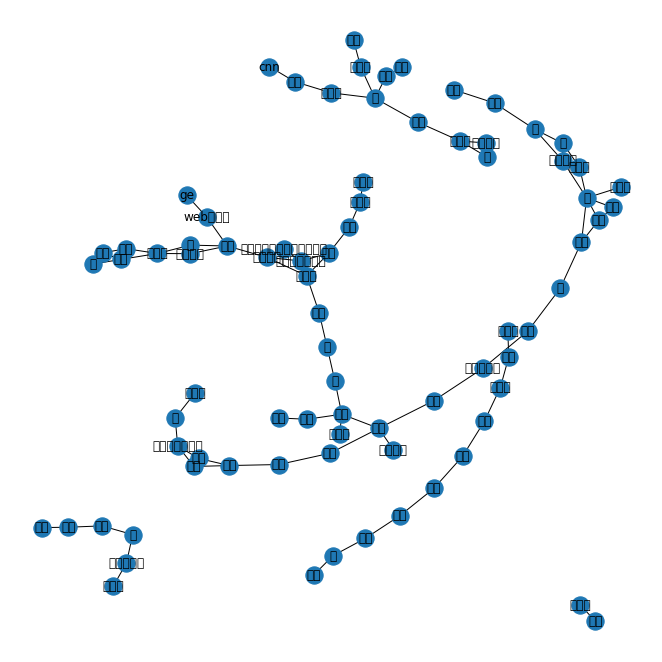

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9, 9))
pos = nx.spring_layout(lemma_graph)

nx.draw(lemma_graph, pos=pos, with_labels=False, font_weight="bold")
nx.draw_networkx_labels(lemma_graph, pos, labels)

In [12]:
ranks = nx.pagerank(lemma_graph)
ranks

{0: 0.0070481830099419825,
 1: 0.012171928171781324,
 2: 0.015198283222789476,
 3: 0.014382307716593608,
 4: 0.014382307716593608,
 5: 0.0145633782599347,
 6: 0.010677589245203662,
 7: 0.011004259896597583,
 8: 0.02160211061995865,
 9: 0.01133459188881941,
 10: 0.011454437241950128,
 11: 0.011207200485380677,
 12: 0.010501955400541904,
 13: 0.013638968968648062,
 14: 0.013199286977479931,
 15: 0.025133145469022615,
 16: 0.009175378522576421,
 17: 0.008661413306461785,
 18: 0.012241335664218873,
 19: 0.015614529558017625,
 20: 0.011884318802721009,
 21: 0.015166748121507603,
 22: 0.01165855303893772,
 23: 0.01165855303893772,
 24: 0.019161425082962792,
 25: 0.018248772119743847,
 26: 0.008136203329252505,
 27: 0.01858172344639079,
 28: 0.019072249847784044,
 29: 0.00968189323252363,
 30: 0.010741150253091386,
 31: 0.011178028233633869,
 32: 0.022300290874665014,
 33: 0.006613340467734964,
 34: 0.008230795283177654,
 35: 0.014954785687641888,
 36: 0.014314419029180458,
 37: 0.01431441902

In [13]:
imp_list = []
for node_id, rank in sorted(ranks.items(), key=lambda x: x[1], reverse=True):
    print(node_id, rank, labels[node_id])
    imp_list.append(labels[node_id])

15 0.025133145469022615 煙
63 0.0234355140743856 つ
32 0.022300290874665014 火災
8 0.02160211061995865 当局
24 0.019161425082962792 よる
28 0.019072249847784044 パーク
27 0.01858172344639079 アプライアンス
25 0.018248772119743847 ルイビル
42 0.016689164924479565 オレンジ
76 0.01640828758562872 施設内
19 0.015614529558017625 管理
2 0.015198283222789476 ケンタッキー州
21 0.015166748121507603 マイク
35 0.014954785687641888 閉じ込める
38 0.014954785687641888 無い
5 0.0145633782599347 巨大
48 0.014523680843606343 影響
55 0.014523680843606342 水
3 0.014382307716593608 工業
4 0.014382307716593608 団地
37 0.01431441902918046 報告
36 0.014314419029180458 者
44 0.014061825128484643 炎
61 0.013929831838542635 語る
49 0.013669137996425058 受ける
54 0.013669137996425058 周辺
13 0.013638968968648062 地域
64 0.013229813000839238 警報
78 0.013229813000839238 収まる
50 0.01322326486235477 建物
53 0.01322326486235477 取る
14 0.013199286977479931 濃い
51 0.013035251335406332 周り
52 0.013035251335406332 位置
43 0.012993547577576342 色
68 0.012924644959250851 施設
58 0.012848667320362928 原因


In [14]:
import math
def collect_phrases (chunk, phrases, counts):
    chunk_len = chunk.end - chunk.start + 1
    sq_sum_rank = 0.0
    non_lemma = 0
    compound_key = set([])

    for i in range(chunk.start, chunk.end):
        token = doc[i]
        key = (token.lemma_, token.pos_)
        
        if key in seen_lemma:
            node_id = list(seen_lemma.keys()).index(key)
            rank = ranks[node_id]
            sq_sum_rank += rank
            compound_key.add(key)
        
            print(" {} {} {} {}".format(token.lemma_, token.pos_, node_id, rank))
        else:
            non_lemma += 1
    
    # although the noun chunking is greedy, we discount the ranks using a
    # point estimate based on the number of non-lemma tokens within a phrase
    non_lemma_discount = chunk_len / (chunk_len + (2.0 * non_lemma) + 1.0)

    # use root mean square (RMS) to normalize the contributions of all the tokens
    phrase_rank = math.sqrt(sq_sum_rank / (chunk_len + non_lemma))
    phrase_rank *= non_lemma_discount

    # remove spurious punctuation
    phrase = chunk.text.lower().replace("'", "")

    # create a unique key for the the phrase based on its lemma components
    compound_key = tuple(sorted(list(compound_key)))
    
    if not compound_key in phrases:
        phrases[compound_key] = set([ (phrase, phrase_rank) ])
        counts[compound_key] = 1
    else:
        phrases[compound_key].add( (phrase, phrase_rank) )
        counts[compound_key] += 1

    print("{} {} {} {} {} {}".format(phrase_rank, chunk.text, chunk.start, chunk.end, chunk_len, counts[compound_key]))

In [15]:
phrases = {}
counts = {}

for chunk in doc.noun_chunks:
    collect_phrases(chunk, phrases, counts)



 金曜日 NOUN 0 0.0070481830099419825
0.0395760393558807 金曜日 0 1 2 1
 朝 NOUN 1 0.012171928171781324
0.0520083928521399 朝 2 3 2 1
 ケンタッキー州 PROPN 2 0.015198283222789476
0.0581153703569976 ケンタッキー州 4 5 2 1
 工業 NOUN 3 0.014382307716593608
 団地 NOUN 4 0.014382307716593608
0.07343953563117488 工業団地 6 8 3 1
 火事 NOUN 6 0.010677589245203662
0.04871137043899769 火事 11 12 2 1
 当局 NOUN 8 0.02160211061995865
0.06928541712840788 当局 16 17 2 1
 被害 NOUN 9 0.01133459188881941
0.05018762992526569 被害 18 19 2 1
 為 NOUN 12 0.010501955400541904
0.04830908679313954 ため 24 25 2 1
 地域 NOUN 13 0.013638968968648062
0.05505344669530603 地域 27 28 2 1
 煙 NOUN 15 0.025133145469022615
0.07473381722861866 煙 30 31 2 1
 市 NOUN 17 0.008661413306461785
0.043872069845712354 市 36 37 2 1
 緊急 NOUN 18 0.012241335664218873
 管理 NOUN 19 0.015614529558017625
 機関 NOUN 20 0.011884318802721009
0.0797397607470276 緊急管理機関 38 41 4 1
 マイク PROPN 21 0.015166748121507603
0.05805504690762151 マイク 42 43 2 1
 ワイマー PROPN 22 0.01165855303893772
 氏 NOUN 23 0.

In [16]:
import math
def collect_5w1hphrases (chunk,chunk_start,chunk_end, phrases, counts):
    chunk_len = chunk_end - chunk_start + 1
    sq_sum_rank = 0.0
    non_lemma = 0
    compound_key = set([])

    for i in range(chunk_start, chunk_end):
        token = doc[i]
        key = (token.lemma_, token.pos_)
        
        if key in seen_lemma:
            node_id = list(seen_lemma.keys()).index(key)
            rank = ranks[node_id]
            sq_sum_rank += rank
            compound_key.add(key)
        
            print(" {} {} {} {}".format(token.lemma_, token.pos_, node_id, rank))
        else:
            non_lemma += 1
    
    # although the noun chunking is greedy, we discount the ranks using a
    # point estimate based on the number of non-lemma tokens within a phrase
    non_lemma_discount = chunk_len / (chunk_len + (2.0 * non_lemma) + 1.0)

    # use root mean square (RMS) to normalize the contributions of all the tokens
    phrase_rank = math.sqrt(sq_sum_rank / (chunk_len + non_lemma))
    phrase_rank *= non_lemma_discount

    # remove spurious punctuation
    phrase = chunk.replace("'", "")

    # create a unique key for the the phrase based on its lemma components
    compound_key = tuple(sorted(list(compound_key)))
    
    if not compound_key in phrases:
        phrases[compound_key] = set([ (phrase, phrase_rank) ])
        counts[compound_key] = 1
    else:
        phrases[compound_key].add( (phrase, phrase_rank) )
        counts[compound_key] += 1

    print("{} {} {} {} {} {}".format(phrase_rank, chunk, chunk_start, chunk_end, chunk_len, counts[compound_key]))

In [17]:
from parse_5w1h import parse_5w1h
parse = parse_5w1h(0)
parse.extract(text)


In [18]:
parse.display_5w1h()

金曜日の朝、ケンタッキー州の工業団地で巨大な火事が
Who


発生し、
How


当局が
Who


被害を
What


封じ込めようと働いた
How


ため、
Why


その地域に濃い
How


煙が
Who


噴出した。
How


市の緊急管理機関のマイク・
None


ワイマー氏によると、
How


ルイビルのゼネラル・エレクトリック・アプライアンス・
None


パークで午前7時
When


少し前に火災が
Who


始まりました。
How


彼は、負傷者や閉じ込められた者の報告は
Who


ないと言った。
How


ビデオは
Who


煙と明るいオレンジ色の炎の両方を
What


示しました。
How


消防士は
Who


影響を
What


受けた
How


建物の周りの位置を
What


取り、
How


周辺から水を
What


噴霧しました。
How


ワイマーは、
None


当局が
Who


火災の原因を
What


知らなかったとCNNに語り、少なくとも
How


4つの警報が
Who


鳴った。
How


GEのWebサイトによると、
How


ルイビルアプライアンスパークの施設は、
Who


米国の
Where


製造業を
What


活性化しています。
How


公園は
Who


大きく、
How


34のサッカー場が
Who


施設内の倉庫の1つに収まるようになっています。
How




In [20]:
phrases = {}
counts = {}

for i,chunk in enumerate(parse._5w1hs):
    collect_5w1hphrases(chunk, parse._5w1h_s[i],parse._5w1h_e[i],phrases, counts)

 金曜日 NOUN 0 0.0070481830099419825
 朝 NOUN 1 0.012171928171781324
 ケンタッキー州 PROPN 2 0.015198283222789476
 工業 NOUN 3 0.014382307716593608
 団地 NOUN 4 0.014382307716593608
 巨大 ADJ 5 0.0145633782599347
 火事 NOUN 6 0.010677589245203662
0.03447738325408601 金曜日の朝、ケンタッキー州の工業団地で巨大な火事が 0 13 14 1
 発生 VERB 7 0.011004259896597583
0.019033658639495944 発生し、 13 16 4 1
 当局 NOUN 8 0.02160211061995865
0.03674414121662684 当局が 16 18 3 1
 被害 NOUN 9 0.01133459188881941
0.026616010088877203 被害を 18 20 3 1
 封じ込める VERB 10 0.011454437241950128
 働く VERB 11 0.011207200485380677
0.028448975456904047 封じ込めようと働いた 20 24 5 1
 為 NOUN 12 0.010501955400541904
0.025619762148268842 ため、 24 26 3 1
 地域 NOUN 13 0.013638968968648062
 濃い ADJ 14 0.013199286977479931
0.030959798787026097 その地域に濃い 26 30 5 1
 煙 NOUN 15 0.025133145469022615
0.039633591709734226 煙が 30 32 3 1
 噴出 VERB 16 0.009175378522576421
0.014110933970548857 噴出した。 32 36 5 1
 市 NOUN 17 0.008661413306461785
 緊急 NOUN 18 0.012241335664218873
 管理 NOUN 19 0.015614529558017625
 

In [ ]:
phrases = {}
counts = {}
for sent in doc.sents:
    collect_phrases(sent, phrases, counts)

In [21]:
import operator

min_phrases = {}

for compound_key, rank_tuples in phrases.items():
    l = list(rank_tuples)
    l.sort(key=operator.itemgetter(1), reverse=True)
    
    phrase, rank = l[0]
    count = counts[compound_key]
    
    min_phrases[phrase] = (rank, count)

In [22]:
for phrase, (rank, count) in sorted(min_phrases.items(), key=lambda x: x[1][0], reverse=True)[0:3]:
    print(phrase)

煙と明るいオレンジ色の炎の両方を
ルイビルアプライアンスパークの施設は、
市の緊急管理機関のマイク・


In [ ]:
for node_id, rank in sorted(ranks.items(), key=lambda x: x[1], reverse=True):
    print(labels[node_id], rank)